In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.cm as cm
import networkx.algorithms.community as nxcom
from community import community_louvain

import ipdb

In [2]:
nodes = pd.read_csv('Proj_Data/node.csv', index_col=0)
edges = pd.read_csv('Proj_Data/edges_with_qkv.csv', index_col=0)

In [3]:
relation_df = edges[['node1', 'node2', 'q']].copy()

In [4]:
relation = np.array(relation_df)

In [5]:
G = nx.Graph()
G.add_nodes_from(np.array(nodes.index))
G.add_weighted_edges_from(relation)  # add weight from flow

print('There are %d nodes.' % G.number_of_nodes())
print('There are %d edges.' % G.number_of_edges())

There are 1304 nodes.
There are 1397 edges.


In [6]:
pos0 = nodes.loc[:, ['Long', 'Lat']]
pos0 = np.array(pos0)

vnode = pos0
npos = dict(zip(np.array(nodes.index), vnode))  # 获取节点与坐标之间的映射关系，用字典表示

In [7]:
partition = community_louvain.best_partition(G, resolution=55, weight='weight', random_state=1)

In [12]:
partition

{0: 3,
 1: 3,
 2: 3,
 3: 3,
 4: 3,
 5: 3,
 6: 1,
 7: 1,
 8: 3,
 9: 2,
 10: 2,
 11: 2,
 12: 2,
 13: 2,
 14: 2,
 15: 3,
 16: 3,
 17: 3,
 18: 3,
 19: 3,
 20: 3,
 21: 3,
 22: 3,
 23: 3,
 24: 3,
 25: 3,
 26: 3,
 27: 3,
 28: 3,
 31: 3,
 32: 3,
 33: 3,
 34: 3,
 35: 3,
 36: 3,
 37: 0,
 38: 3,
 39: 3,
 40: 3,
 41: 2,
 42: 2,
 43: 2,
 44: 0,
 45: 0,
 46: 0,
 47: 0,
 48: 0,
 49: 0,
 50: 0,
 51: 0,
 52: 0,
 53: 0,
 54: 0,
 55: 3,
 57: 3,
 58: 3,
 59: 3,
 60: 0,
 61: 0,
 62: 0,
 63: 2,
 64: 1,
 65: 0,
 66: 0,
 67: 0,
 68: 0,
 69: 0,
 70: 0,
 71: 0,
 72: 0,
 73: 0,
 74: 2,
 77: 2,
 78: 2,
 79: 2,
 80: 2,
 81: 3,
 82: 3,
 83: 3,
 84: 3,
 85: 3,
 86: 3,
 87: 3,
 88: 3,
 89: 3,
 90: 3,
 91: 3,
 92: 3,
 93: 3,
 94: 3,
 95: 3,
 96: 3,
 97: 3,
 98: 3,
 99: 3,
 100: 3,
 101: 2,
 102: 3,
 103: 3,
 104: 1,
 105: 1,
 106: 1,
 107: 1,
 108: 1,
 109: 1,
 110: 1,
 111: 2,
 112: 2,
 113: 2,
 114: 2,
 115: 2,
 116: 2,
 117: 2,
 118: 2,
 119: 3,
 120: 3,
 121: 3,
 122: 3,
 123: 3,
 124: 3,
 125: 3,
 126: 3,
 127: 3

In [8]:
par_df = pd.DataFrame(partition, index=[0]).T
par_df.columns=['cls']

In [13]:
par_df

,cls
0,3
1,3
2,3
3,3
4,3
...,...
1316,2
1317,2
1318,2
1319,3


In [9]:
nodes['cls'] = par_df['cls']
nodes['q0'] = nodes['q']*12
nodes['k0'] = nodes['q0']/nodes['v']

In [14]:
nodes['cls']

0       3
1       3
2       3
3       3
4       3
       ..
1316    2
1317    2
1318    2
1319    3
1320    3
Name: cls, Length: 1304, dtype: int64

In [15]:
nodes

,index,ID,q,k,v,Long,Lat,cls,q0,k0
0,0,715898,410.684028,0.090358,62.457812,-118.021787,33.880183,3,4928.208333,78.904594
1,3,715929,405.503472,0.154721,54.573437,-118.123095,33.971707,3,4866.041667,89.165020
2,5,715933,383.663194,0.131772,56.324479,-118.130679,33.981839,3,4603.958333,81.739918
3,6,715938,393.451389,0.137075,54.980208,-118.150997,34.002541,3,4721.416667,85.874841
4,7,715944,381.265625,0.151283,56.689583,-118.166091,34.013676,3,4575.187500,80.705964
...,...,...,...,...,...,...,...,...,...,...
1316,1863,776457,308.024306,0.048418,68.017014,-118.712596,34.140004,2,3696.291667,54.343633
1317,1864,776465,252.569444,0.050435,66.585069,-118.865433,34.176675,2,3030.833333,45.518212
1318,1865,776480,318.086806,0.165058,53.344792,-118.231606,34.053569,2,3817.041667,71.554158
1319,1866,776487,314.135417,0.066274,64.290278,-117.997784,34.079858,3,3769.625000,58.634449


In [10]:
len(nodes['cls'].drop_duplicates())

8

In [16]:
data_new = pd.read_csv('./Proj_Data/2019-10-21_with_cord.csv', index_col=0)
data_new = data_new.loc[data_new['Lane type']=='ML']

In [17]:
data_new['cls'] = ''
for i in nodes.index:
    ID = nodes.loc[i, 'ID']
    cls = nodes.loc[i, 'cls']
    data_new.loc[data_new['ID']==ID, 'cls'] = cls
data_new['q0'] = data_new['q'] * 12
data_new['k0'] = data_new['q0'] / data_new['Avg v']

There are 4 classes


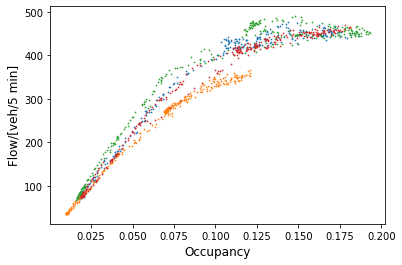

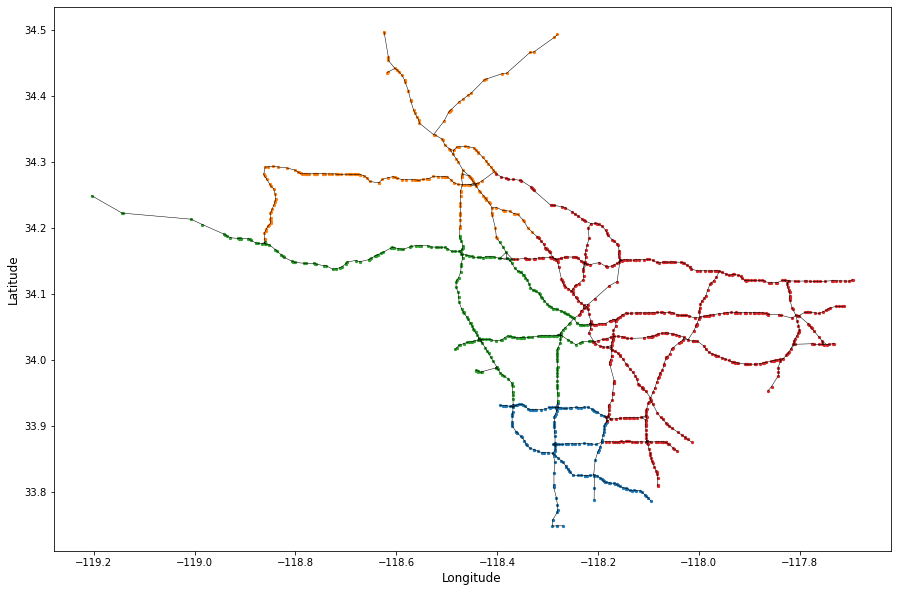

In [19]:
c = 0
c_set = []
color_set = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
fig_mfd = plt.figure()
ax_mfd = fig_mfd.add_subplot(111)
fig_net = plt.figure(figsize=[15,10])
ax_net = fig_net.add_subplot(111)

for i in edges.index:
    node1 = edges.loc[i, 'node1']
    node2 = edges.loc[i, 'node2']
    ax_net.plot([nodes.loc[node1, 'Long'], nodes.loc[node2, 'Long']], [nodes.loc[node1, 'Lat'], nodes.loc[node2, 'Lat']], 'black', lw=0.5)

for i in range(len(nodes['cls'].drop_duplicates())):
    data_cls = data_new.loc[data_new['cls']==i].sort_values(by=['ID', 'Time'])
    q_cls = data_cls['q'].values
    if q_cls.reshape(-1, 288).shape[0] <= 1:
        continue
    q_cls_avg = q_cls.reshape(-1, 288).mean(axis=0)
    k_cls = data_cls['Avg k'].values
    k_cls_avg = k_cls.reshape(-1, 288).mean(axis=0)
    ax_mfd.scatter(k_cls_avg, q_cls_avg, s=.5, c=color_set[c])
    ax_mfd.set_xlabel('Occupancy', fontsize=12)
    ax_mfd.set_ylabel('Flow/[veh/5 min]', fontsize=12)
    
    lng = nodes.loc[nodes['cls']==i, 'Long']
    lat = nodes.loc[nodes['cls']==i, 'Lat']
    ax_net.scatter(lng, lat, s=5, c=color_set[c])
    ax_net.set_xlabel('Longitude', fontsize=12)
    ax_net.set_ylabel('Latitude', fontsize=12)
    c+=1
    c_set.append(i)
print('There are %i classes'%c)
fig_mfd.savefig('./img/fig_mfd.png', dpi=500)
fig_net.savefig('./img/fig_net.png', dpi=500)

In [21]:
nodes.loc[nodes['cls']==3, 'q']

0       410.684028
1       405.503472
2       383.663194
3       393.451389
4       381.265625
           ...    
1305    361.559028
1310     75.479167
1311    498.100694
1319    314.135417
1320    443.822917
Name: q, Length: 625, dtype: float64

In [31]:
a = 3
NSk = 0
for c in c_set:
    NSk += 2*nodes.loc[nodes['cls']==a, 'q'].std()**2/(nodes.loc[nodes['cls']==a, 'q'].std()**2+nodes.loc[nodes['cls']==c, 'q'].std()**2+(nodes.loc[nodes['cls']==a, 'q'].mean()-nodes.loc[nodes['cls']==c, 'q'].mean())**2)
print(NSk/len(c_set))

0.8208999378464701


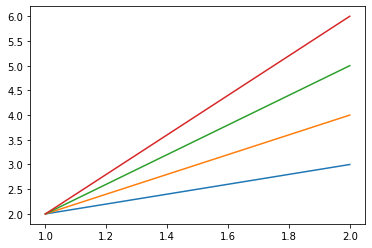

In [27]:
plt.plot([1,2], [2,3])
plt.plot([1,2], [2,4])
plt.plot([1,2], [2,5])
plt.plot([1,2], [2,6])

In [35]:
len(nodes.loc[nodes['cls']==a, 'q'])

625

In [36]:
TV = 0
for c in c_set:
    TV += nodes.loc[nodes['cls']==c, 'q'].__len__()*nodes.loc[nodes['cls']==c, 'q'].std()**2
print(TV)

12262442.766535029
